In [1]:
from hodor_python.dataset import HODOR_Dataset, Species
from dotenv import load_dotenv

load_dotenv(override=True)

True

### Load HODOR Metadata

This notebook downloads the tabular metadata of HODOR to `hodor.tab` if it does not already exist.

The file contains the maxN counts of animals per recording sequence (i.e., the maximum number of individuals visible at the same time).  
After downloading, the file is parsed and cleaned, and the data is stored internally as a pandas DataFrame for further analysis.


In [2]:
# will download automatically if the file does not exist
hodor = HODOR_Dataset(dataset_folder="HODOR")
hodor.counts.head()

,SeqID,sequenceStartUnix,sequenceEndUnix,DateTimeStart,DateTimeEnd,sequence_length,anguilla_anguilla,bird_cormorant,bird_unspecified,crab_crustacea,...,fish_oncorhynchus,fish_pipefish,fish_plaice,fish_salmonidae,fish_scad,fish_unspecified,jellyfish_aurelia,jellyfish_ctenophora,jellyfish_cyanea,jellyfish_unspecified
0,0,1629609208,1629609282,2021-08-22 05:13:28.033,2021-08-22 05:14:41.673,0 days 00:01:13.640000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1629609314,1629609498,2021-08-22 05:15:13.543,2021-08-22 05:18:17.753,0 days 00:03:04.210000,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,2,1629609532,1629609806,2021-08-22 05:18:52.253,2021-08-22 05:23:25.994,0 days 00:04:33.741000,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
3,3,1629609822,1629609921,2021-08-22 05:23:42.204,2021-08-22 05:25:20.834,0 days 00:01:38.630000,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,4,1629609926,1629610084,2021-08-22 05:25:25.724,2021-08-22 05:28:04.184,0 days 00:02:38.460000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Example Use Cases for Data Analysis with the DataFrame

Below are several common data analysis tasks you can perform with the `df` DataFrame using pandas.

**Filter Rows by Condition**

In [3]:
# Find all sequences with more than 10 cod detected
hodor.counts[hodor.counts[Species.FISH_COD] > 10]

,SeqID,sequenceStartUnix,sequenceEndUnix,DateTimeStart,DateTimeEnd,sequence_length,anguilla_anguilla,bird_cormorant,bird_unspecified,crab_crustacea,...,fish_oncorhynchus,fish_pipefish,fish_plaice,fish_salmonidae,fish_scad,fish_unspecified,jellyfish_aurelia,jellyfish_ctenophora,jellyfish_cyanea,jellyfish_unspecified
1464,1464,1631898552,1631898779,2021-09-17 17:09:12.139,2021-09-17 17:12:58.529,0 days 00:03:46.390000,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
1788,1788,1632241059,1632242404,2021-09-21 16:17:38.794,2021-09-21 16:40:04.125,0 days 00:22:25.331000,0,0,0,0,...,0,0,0,0,0,11,0,3,0,0
2892,2892,1633181182,1633181318,2021-10-02 13:26:22.188,2021-10-02 13:28:37.538,0 days 00:02:15.350000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,2895,1633181879,1633182191,2021-10-02 13:37:58.929,2021-10-02 13:43:10.960,0 days 00:05:12.031000,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


**Group By and Aggregate**

In [4]:
# Total number of the specified animal type per day
hodor.counts.groupby(hodor.counts["DateTimeStart"].dt.date)[
    [Species.FISH_UNSPECIFIED, Species.JELLYFISH_CTENOPHORA, Species.JELLYFISH_AURELIA]
].sum()

,fish_unspecified,jellyfish_ctenophora,jellyfish_aurelia
DateTimeStart,,,
2021-08-22,173,4,0
2021-08-23,139,0,0
2021-08-24,438,0,0
2021-08-25,111,0,0
2021-08-26,108,0,0
...,...,...,...
2021-11-12,11,113,0
2021-11-13,14,149,0
2021-11-14,4,127,0


**Sort Data**

In [5]:
# Sort by sequence length
hodor.counts.sort_values("sequence_length", ascending=False).head()

,SeqID,sequenceStartUnix,sequenceEndUnix,DateTimeStart,DateTimeEnd,sequence_length,anguilla_anguilla,bird_cormorant,bird_unspecified,crab_crustacea,...,fish_oncorhynchus,fish_pipefish,fish_plaice,fish_salmonidae,fish_scad,fish_unspecified,jellyfish_aurelia,jellyfish_ctenophora,jellyfish_cyanea,jellyfish_unspecified
632,632,1630580580,1630599927,2021-09-02 11:03:00.105,2021-09-02 16:25:27.053,0 days 05:22:26.948000,0,0,0,0,...,0,0,0,0,0,97,0,0,0,0
5504,5504,1636703657,1636712662,2021-11-12 07:54:17.332,2021-11-12 10:24:22.049,0 days 02:30:04.717000,0,0,0,0,...,0,0,0,0,0,2,0,6,0,1
5017,5017,1636031480,1636038978,2021-11-04 13:11:19.597,2021-11-04 15:16:17.964,0 days 02:04:58.367000,0,0,0,0,...,0,0,0,0,0,2,0,4,1,1
4947,4947,1635920886,1635928322,2021-11-03 06:28:05.660,2021-11-03 08:32:02.010,0 days 02:03:56.350000,0,0,0,0,...,0,0,0,0,0,2,0,7,0,0
955,955,1631095460,1631102892,2021-09-08 10:04:19.846,2021-09-08 12:08:11.587,0 days 02:03:51.741000,0,0,0,0,...,0,0,0,0,0,85,0,0,0,0


In [6]:
# Sort by counts of specific species
hodor.counts.sort_values(Species.FISH_COD, ascending=False).head()

,SeqID,sequenceStartUnix,sequenceEndUnix,DateTimeStart,DateTimeEnd,sequence_length,anguilla_anguilla,bird_cormorant,bird_unspecified,crab_crustacea,...,fish_oncorhynchus,fish_pipefish,fish_plaice,fish_salmonidae,fish_scad,fish_unspecified,jellyfish_aurelia,jellyfish_ctenophora,jellyfish_cyanea,jellyfish_unspecified
2909,2909,1633181182,1633181318,2021-10-02 13:26:22.188,2021-10-02 13:28:37.538,0 days 00:02:15.350000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1804,1804,1632241059,1632242404,2021-09-21 16:17:38.794,2021-09-21 16:40:04.125,0 days 00:22:25.331000,0,0,0,0,...,0,0,0,0,0,11,0,3,0,0
2912,2912,1633181879,1633182191,2021-10-02 13:37:58.929,2021-10-02 13:43:10.960,0 days 00:05:12.031000,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1480,1480,1631898552,1631898779,2021-09-17 17:09:12.139,2021-09-17 17:12:58.529,0 days 00:03:46.390000,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
5520,5520,1636645695,1636645794,2021-11-11 15:48:15.362,2021-11-11 15:49:53.862,0 days 00:01:38.500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Calculate New Columns**

In [6]:
# Calculate the sequence durations in seconds
hodor.counts["duration_seconds"] = hodor.counts["sequence_length"].dt.total_seconds()

**Value Counts**

In [7]:
# total occurrences of each species
hodor.counts[list(Species)].sum().sort_values(ascending=False)

fish_unspecified         12631
fish_clupeidae            5558
jellyfish_ctenophora      5450
fish_cod                   348
jellyfish_unspecified      170
jellyfish_cyanea           132
fish_mackerel               52
fish_salmonidae             20
jellyfish_aurelia            8
bird_cormorant               6
crab_crustacea               4
fish_pipefish                3
fish_plaice                  2
fish_scad                    1
anguilla_anguilla            0
fish_oncorhynchus            0
bird_unspecified             0
fish_mugilidae               0
dtype: int64

In [8]:
# Count how many sequences have at least 1 jellyfish cyanea
sum(hodor.counts[Species.JELLYFISH_CYANEA] > 0)

128

**Pivot Table**

In [9]:
# Summarize animal counts by hour
hodor.counts.pivot_table(
    index=hodor.counts["DateTimeStart"].dt.hour,
    values=[Species.FISH_COD, Species.FISH_CLUPEIDAE],
    aggfunc="sum",
)

,fish_clupeidae,fish_cod
DateTimeStart,,
4,216,17
5,210,26
6,107,17
7,318,9
8,446,10
9,254,9
10,483,17
11,902,6
12,673,17


**Plots**

<Axes: title={'center': 'Cod Counts Over Time'}, xlabel='DateTimeStart'>

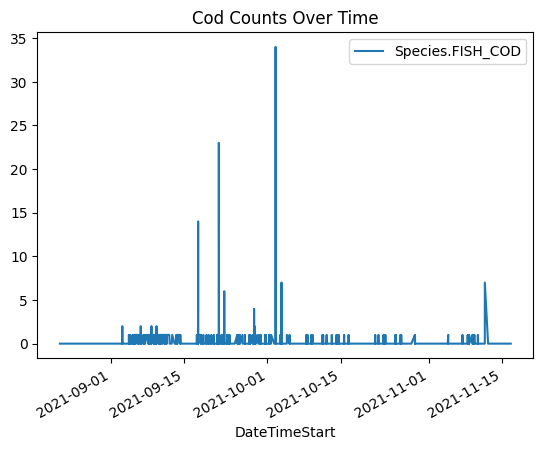

In [10]:
hodor.counts.plot(
    x="DateTimeStart", y=Species.FISH_COD, kind="line", title="Cod Counts Over Time"
)

<Axes: title={'center': 'Total Counts of Selected Species'}>

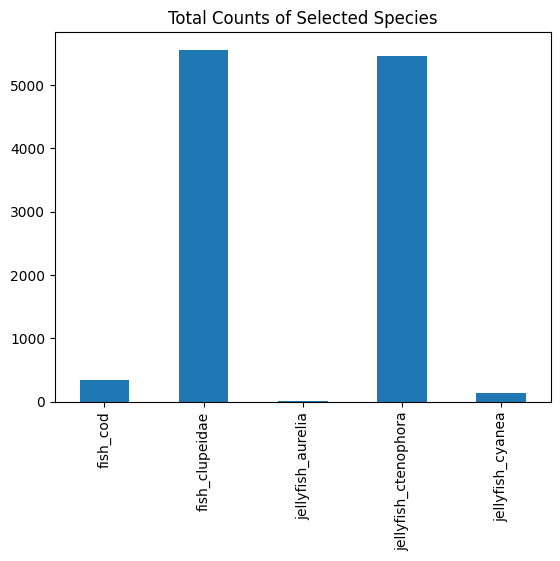

In [11]:
# Bar plot: Total counts of selected species
hodor.counts[
    [
        Species.FISH_COD,
        Species.FISH_CLUPEIDAE,
        Species.JELLYFISH_AURELIA,
        Species.JELLYFISH_CTENOPHORA,
        Species.JELLYFISH_CYANEA,
    ]
].sum().plot(kind="bar", title="Total Counts of Selected Species")